In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from collections import Counter

In [2]:
data = pd.read_csv('/kaggle/input/laptop-price/laptop_price.csv', encoding = 'latin-1')
data.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
data = data.dropna()
data = data.drop(columns = ['laptop_ID'])
data.shape

(1303, 12)

In [5]:
# Task - predict laptop price 
y = np.array(data['Price_euros'])
data = data.drop(columns = ['Price_euros'])

In [6]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [7]:
# Preprocessing
ram1 = list(data['Ram'])
ram2 = []
for i in range(data.shape[0]):
    ram2.append(float(ram1[i].replace('GB', '')))
ram2 = np.array(ram2)

In [8]:
weight1 = list(data['Weight'])
weight2 = []
for i in range(data.shape[0]):
    weight2.append(float(weight1[i].replace('kg', '')))
weight2 = np.array(weight2)

In [9]:
inches2 = np.array(data['Inches'])
data = data.drop(columns = ['Inches', 'Ram', 'Weight'])

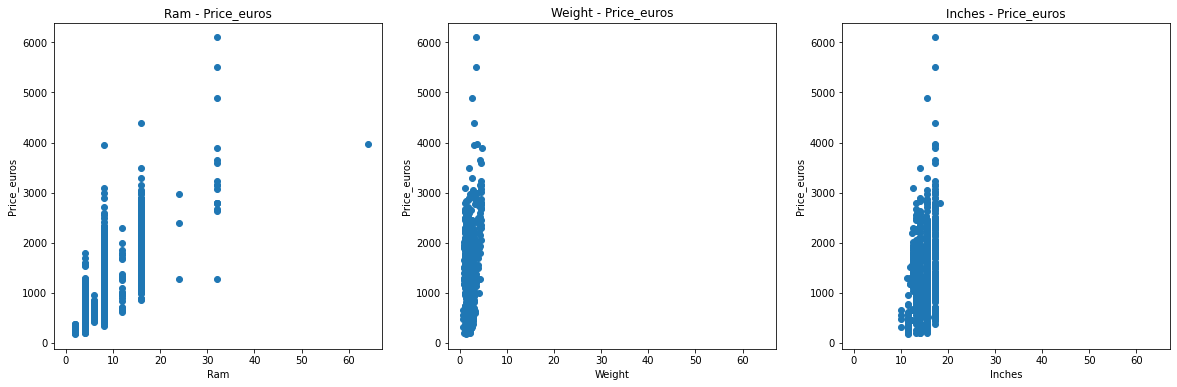

In [10]:
# Scatter plot
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(20, 6))
ax0.set_title('Ram - Price_euros')
ax0.scatter(ram2, y)
ax0.set_xlabel('Ram')
ax0.set_ylabel('Price_euros')

ax1.set_title('Weight - Price_euros')
ax1.scatter(weight2, y)
ax1.set_xlabel('Weight')
ax1.set_ylabel('Price_euros')

ax2.set_title('Inches - Price_euros')
ax2.scatter(inches2, y)
ax2.set_xlabel('Inches')
ax2.set_ylabel('Price_euros')

plt.show()

In [11]:
# Encode categorical features
encoder = OneHotEncoder()
data = encoder.fit_transform(data)
data = data.toarray()

In [12]:
X = np.concatenate((data, inches2[:, np.newaxis], ram2[:, np.newaxis], weight2[:, np.newaxis]), axis = 1)

In [13]:
X.shape

(1303, 962)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# Ridge regression
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2: 0.8803367654970733
mse: 64070.59034568524
mae: 174.58759506713886


In [16]:
# Lasso regression
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2: 0.831928136644965
mse: 89989.74121323007
mae: 211.43151020087257


In [17]:
# Epsilon-Support Vector Regression
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2: 0.016593876658251294
mse: 526539.4265314346
mae: 503.2037140030953


In [18]:
# Gradient Boosting
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2: 0.8307711179597765
mse: 90609.23700497382
mae: 209.62665427886384


In [19]:
# Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2: 0.8261261228111374
mse: 93096.27976762688
mae: 193.532868744186


In [20]:
# Ada Boost
model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2: 0.5742595263325125
mse: 227951.7480472287
mae: 396.9984864718329


In [21]:
# XGBoost Regression
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2: 0.8519125753255192
mse: 79289.58933024763
mae: 188.47837437261538


R2: 0.8803367654970733
mse: 64070.59034568524
mae: 174.58759506713886


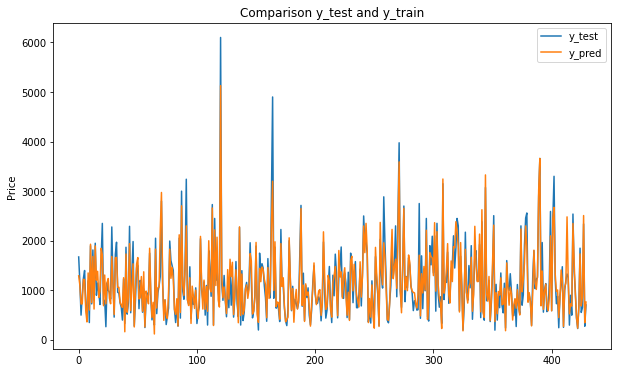

In [22]:
#Best model - Ridge regression
best_model = Ridge()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))
plt.figure(figsize = (10, 6))
plt.plot(np.arange(len(y_test)), y_test, label = 'y_test')
plt.plot(np.arange(len(y_test)), y_pred, label = 'y_pred')
plt.xlabel('')
plt.ylabel('Price')
plt.legend()
plt.title('Comparison y_test and y_train')
plt.show()